In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

city_data = "./raw_data/city_data.csv"
ride_data = "./raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
city            126 non-null object
driver_count    126 non-null int64
type            126 non-null object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [3]:
ride_df = pd.read_csv(ride_data)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
merge_df = pd.merge(city_df, ride_df, how="outer", on="city")
merge_df.head()

total_rides = merge_df.groupby(["city", "type"])["ride_id"].count()
avg_fare = merge_df.groupby(["city", "type"])["fare"].mean()
drivers = merge_df.groupby(["city", "type"])["driver_count"].max()


pyber_analysis = pd.DataFrame({ "total_rides": total_rides,
                               "avg_fare": avg_fare,
                               "drivers" : drivers}).reset_index()

pyber_analysis.head()

,city,type,avg_fare,drivers,total_rides
0,Alvarezhaven,Urban,23.928710,21,31
1,Alyssaberg,Urban,20.609615,67,26
2,Anitamouth,Suburban,37.315556,16,9
3,Antoniomouth,Urban,23.625000,21,22
4,Aprilchester,Urban,21.981579,49,19


In [5]:
total_rides = ride_df.groupby("city")["ride_id"].count()
avg_fare = ride_df.groupby("city")["fare"].mean()
sum_fare = ride_df.groupby("city")["fare"].sum()

ride_grouped_df = pd.DataFrame({ "total_rides": total_rides,
                               "avg_fare": avg_fare,
                               "sum_fare": sum_fare}).reset_index()

ride_grouped_df.head()

,city,avg_fare,sum_fare,total_rides
0,Alvarezhaven,23.928710,741.79,31
1,Alyssaberg,20.609615,535.85,26
2,Anitamouth,37.315556,335.84,9
3,Antoniomouth,23.625000,519.75,22
4,Aprilchester,21.981579,417.65,19


In [6]:
combine_df = pd.merge(city_df, ride_grouped_df, on="city")
combine_df.head()

,city,driver_count,type,avg_fare,sum_fare,total_rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


In [7]:
urban_df = pyber_analysis.loc[(pyber_analysis["type"] == "Urban")]
suburban_df = pyber_analysis.loc[(pyber_analysis["type"] == "Suburban")]
rural_df = pyber_analysis.loc[(pyber_analysis["type"] == "Rural")]


<function matplotlib.pyplot.show>

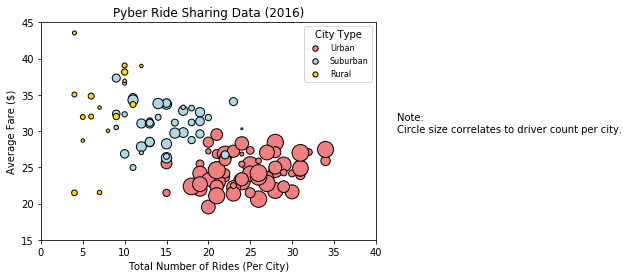

In [8]:


xu= urban_df['total_rides']
yu=urban_df['avg_fare']
su=[4*n for n in urban_df['drivers']]

xs= suburban_df['total_rides']
ys= suburban_df['avg_fare']
ss=[4*n for n in suburban_df['drivers']]

xr= rural_df['total_rides']
yr= rural_df['avg_fare']
sr=[4*n for n in rural_df['drivers']]

uscat = plt.scatter(xu,yu,s=su, c='lightcoral', label = 'Urban', edgecolor = 'black', linewidth=1)
sscat = plt.scatter(xs,ys,s=ss, c='lightblue', label = 'Suburban', edgecolor = 'black', linewidth=1)
rscat = plt.scatter(xr,yr,s=sr, c='gold', label = 'Rural', edgecolor = 'black', linewidth=1)

plt.ylim(15, 45)
plt.xlim(0,40)
lgnd = plt.legend(scatterpoints=1, loc='best', numpoints=1, title="City Type"
           , fontsize=8)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# plt.annotate("Note:\n Circle size correlates to driver count per city. ", (0,0), (0,-20), xycoords = 'axes fraction',
#              textcoords='offset points', va='center')

plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates to driver count per city.', horizontalalignment='left') 

plt.show

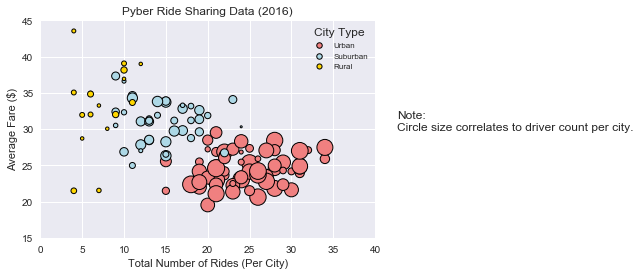

In [9]:
# import seaborn as sns
# %matplotlib inline
sns.set()
xu= urban_df['total_rides']
yu=urban_df['avg_fare']
su=[4*n for n in urban_df['drivers']]

xs= suburban_df['total_rides']
ys= suburban_df['avg_fare']
ss=[4*n for n in suburban_df['drivers']]

xr= rural_df['total_rides']
yr= rural_df['avg_fare']
sr=[4*n for n in rural_df['drivers']]

plt.scatter(xu,yu,s=su, c='lightcoral', label = 'Urban', edgecolor = 'black', linewidth=1)
plt.scatter(xs,ys,s=ss, c='lightblue', label = 'Suburban', edgecolor = 'black', linewidth=1)
plt.scatter(xr,yr,s=sr, c='gold', label = 'Rural', edgecolor = 'black', linewidth=1)

plt.ylim(15, 45)
plt.xlim(0,40)
lgnd = plt.legend(scatterpoints=1, loc='best', numpoints=1, title="City Type"
           , fontsize=8)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# plt.annotate("Note:\n Circle size correlates to driver count per city. ", (0,0), (0,-20), xycoords = 'axes fraction',
#              textcoords='offset points', va='center')

plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates to driver count per city.', horizontalalignment='left') 
plt.savefig("PyberRideSharing_Seaborn.png")
# sns.plt.show

In [10]:
sum_fares = combine_df.groupby("type")["sum_fare"].sum()
sum_sum_fares = combine_df.groupby("type")["sum_fare"].sum().sum()
fares_pct = sum_fares/sum_sum_fares

fares_pie = pd.DataFrame({"Fares" : sum_fares
                          ,"Pct_Fares" : fares_pct})

fares_pie.head()

,Fares,Pct_Fares
type,,
Rural,4255.09,0.065798
Suburban,20335.69,0.314458
Urban,40078.34,0.619745


([<matplotlib.patches.Wedge at 0x1a1700a4a8>,
 [Text(-0.318737,1.05281,'Rural'),
  Text(-1.09628,0.0903317,'Suburban'),
  Text(1.24612,-0.370395,'Urban')],
 [Text(-0.173856,0.57426,'6.6%'),
  Text(-0.597973,0.0492718,'31.4%'),
  Text(0.766841,-0.227935,'62.0%')])

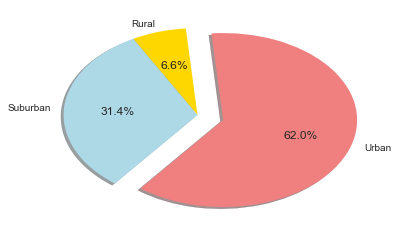

In [11]:
types = ["Rural", "Suburban", "Urban"]
pct_fare = fares_pie["Pct_Fares"]
colors = ["gold", "lightblue",  "lightcoral" ]
explode = (0, 0, 0.2)

plt.pie(pct_fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=95)

In [12]:
sum_ride = combine_df.groupby("type")["total_rides"].sum()
sum_sum_rides = combine_df.groupby("type")["total_rides"].sum().sum()
rides_pct = sum_ride/sum_sum_rides

rides_pie = pd.DataFrame({" Total Rides" : sum_ride
                          ,"Pct Rides" : rides_pct})

rides_pie.head()

,Total Rides,Pct Rides
type,,
Rural,125,0.051932
Suburban,657,0.272954
Urban,1625,0.675114


([<matplotlib.patches.Wedge at 0x1a170c0240>,
 [Text(-0.272587,1.06569,'Rural'),
  Text(-1.05096,0.32478,'Suburban'),
  Text(1.16321,-0.580475,'Urban')],
 [Text(-0.148684,0.581286,'5.2%'),
  Text(-0.573251,0.177153,'27.3%'),
  Text(0.715819,-0.357215,'67.5%')])

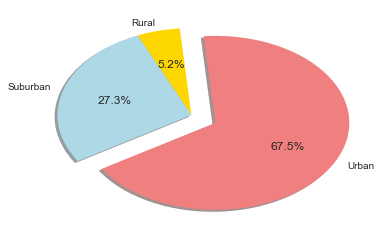

In [13]:
types = ["Rural", "Suburban", "Urban"]
pct_rides = rides_pie["Pct Rides"]
colors = ["gold", "lightblue",  "lightcoral" ]
explode = (0, 0, 0.2)

plt.pie(pct_rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=95)

In [14]:
sum_drivers = combine_df.groupby("type")["driver_count"].sum()
sum_sum_drivers = combine_df.groupby("type")["driver_count"].sum().sum()
drivers_pct = sum_drivers/sum_sum_drivers

drivers_pie = pd.DataFrame({" Total Drivers" : sum_drivers
                          ,"Pct Drivers" : drivers_pct})

drivers_pie.head()

,Total Drivers,Pct Drivers
type,,
Rural,104,0.031054
Suburban,638,0.190505
Urban,2607,0.778441


([<matplotlib.patches.Wedge at 0x1a1716c048>,
 [Text(-0.202153,1.08127,'Rural'),
  Text(-0.848424,0.700126,'Suburban'),
  Text(0.917321,-0.921153,'Urban')],
 [Text(-0.110265,0.589781,'3.1%'),
  Text(-0.462777,0.381887,'19.1%'),
  Text(0.564505,-0.566863,'77.8%')])

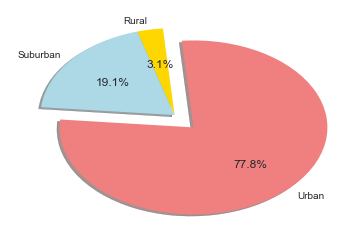

In [15]:
types = ["Rural", "Suburban", "Urban"]
pct_drivers = drivers_pie["Pct Drivers"]
colors = ["gold", "lightblue",  "lightcoral" ]
explode = (0, 0, 0.2)

plt.pie(pct_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=95)